<a href="https://colab.research.google.com/github/skatmeister/airflowkubernetes/blob/main/gradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start with a few points than can be fit linearly in some number of dimensions

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 \ldots 
$$


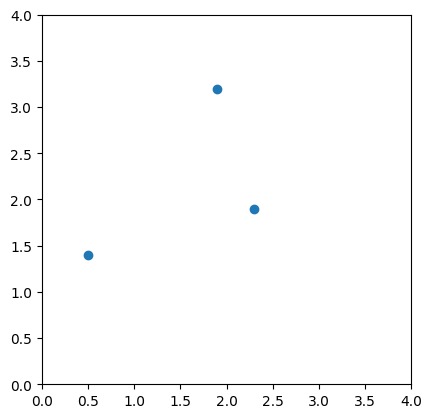

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([0.5, 2.3, 1.9])
y=np.array([1.4, 1.9, 3.2])

plt.scatter(x, y)
ax = plt.gca()
ax.set_ylim(bottom=0, top=4)
ax.set_xlim(left=0, right=4)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()


Make an initial guess at a line

$$
y = .5 + (-.1) x
$$


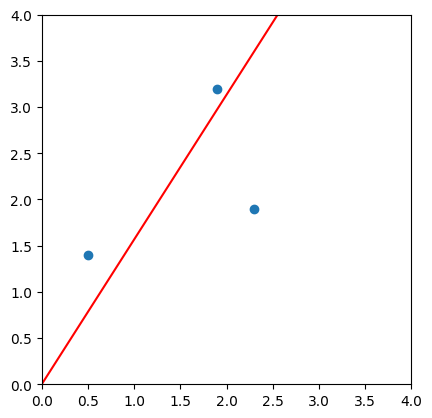

In [9]:
# initial guess at b0 and b1
b = np.array([0,x.mean()])
# find the endpoints of the line using these 
xleft  = 0
xright = 4
ybot = b[0] + b[1] * xleft
ytop = b[0] + b[1] * xright
plt.scatter(x, y)
plt.plot([xleft, xright], [ybot, ytop], color='red')
ax = plt.gca()
ax.set_ylim(bottom=0, top=4)
ax.set_xlim(left=0, right=4)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()


So we have two parameters, $\beta_0$ and $\beta_1$

The residual error is how far off each estimate from the formula is versus the actual point

$$
\epsilon = (Actual - Predicted)
$$

or, using $y$ for the actual value and $\hat{y}$ for the predicted value

$$
\epsilon = (y - \hat{y})
$$

Where the actual point is given from the data, and the predicted point is from the formula, so for

$$
\epsilon = (y - (\beta_0 + \beta_1 x))
$$

Since the points are given as $[x_1,y_1], [x_2, y_2], [x_3, y_3]$

then the cumulative error is

$$
\epsilon = ((y_1 - (\beta_0 + \beta_1 x_1)) + ((y_2 - (\beta_0 + \beta_1 x_2))
+ ((y_3 - (\beta_0 + \beta_1 x_3))
$$

Using summation for the $n=3$ points

$$
\epsilon = \sum_{i=1}^{n=3} (y_i - (\beta_0 + \beta_1 x_i))
$$

The problem with this formulation is that a negative error and a positive error would cancel each other out, so either take the absolute value or square the error. Here the error will be squared because it is easier to take the derivative of $x^2$ than $|x|$

$$
\epsilon = \sum_{i=1}^{n=3} (y_i - (\beta_0 + \beta_1 x_i))^2
$$

Now, for gradient descent, the idea is to use the gradient or slope to correct the errors in $\beta_0$ and $\beta_1$

The slope of each is the derivative with respect to each parameter. Using the chain rule the derivative of 
$$
(\text{expression with term})^2
$$ 
is 
$$
2 \cdot \text{(expression with term)} \cdot \text{derivative (expression with term)}
$$

So plugging the chain rule for $\frac{d}{d \beta_0}$ into this equation

$$
\frac{d}{d \beta_0} (y_i - (\beta_0 + \beta_1 x_i))^2 = 2(y_i - (\beta_0 + \beta_1 x_i))(-1) = (-2)(y_i - (\beta_0 + \beta_1 x_i))
$$

so the cumulative "gradient" error for each point with respect to $\beta_0$ is

$$
\epsilon_{\beta_0} = \sum_{i-1}^{n=3} (-2)(y_i - (\beta_0 + \beta_1 x_i))
$$

And instead of just adding the $\epsilon_{beta_0}$ to the original $\beta_0$ to get a newew estimate, scale it with a small "learning rate" to make small adjustments in the correct direction, and as the slope gets smaller, the adjustments get smaller

$$
\beta_{0_{NEW}} = \beta_{0_{OLD}} - \epsilon_{beta_0} \cdot \text{learning_rate}
$$

Now using learning_rate=.01 the next guess for an improved $\beta_0$ is

$$
\beta_{0_{NEW}} = \beta_{0_{OLD}} - \left( \sum_{i-1}^{n=3} (-2)(y_i - (\beta_0 + \beta_1 x_i)) \right) \cdot (.01)
$$

Repeating the process for $\beta_1$

$$
\frac{d}{d \beta_1} (y_i - (\beta_0 + \beta_1 x_i))^2 = 2(y_i - (\beta_0 + \beta_1 x_i))(-x_i) = (-2x_i)(y_i - (\beta_0 + \beta_1 x_i))
$$

And the new guess for $\beta_{1_{NEW}}$

$$
\beta_{1_{NEW}} = \beta_{1_{OLD}} - \left( \sum_{i-1}^{n=3} (-2x_i)(y_i - (\beta_0 + \beta_1 x_i)) \right) \cdot (.01)
$$


In [10]:
learning_rate = .1
x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])
yhat = b[0] + b[1] * x
yhat

array([0.78333333, 3.60333333, 4.54333333])

In [11]:
residuals = y - yhat
residuals

array([ 0.61666667, -1.70333333, -1.34333333])

In [12]:
csum = (-2*residuals).sum()
csum

4.859999999999996

In [13]:
b0 = b[0]
b1 = b[1]
b0new = b0 - csum * learning_rate
b0new

-0.4859999999999996

In [14]:
b0newnew  = b0new - (-2*(y - (b0new + b1 * x))).sum() * learning_rate
b0newnew

-0.6803999999999994

In [15]:
b0newnewnew  = b0newnew - (-2*(y - (b0newnew + b1 * x))).sum() * learning_rate
b0newnewnew

-0.7581599999999993

In [16]:
b1new = b1 - (-2*np.multiply(x, residuals)).sum()*learning_rate
b1new

0.06566666666666743

b0=0 b1=0.5
b0slope=-7.300000000000001 b1slope=-14.75
qq=0 b0=0.07300000000000001 b1=0.6475
b0slope=-5.180500000000001 b1slope=-9.802550000000004
qq=1 b0=0.12480500000000003 b1=0.7455255000000001
b0slope=-3.7521793 b1slope=-6.477061550000002
qq=2 b0=0.16232679300000002 b1=0.8102961155000001
b0slope=-2.7886635252999987 b1slope=-4.242212937349997
qq=3 b0=0.19021342825300003 b1=0.8527182448735001
b0slope=-2.137731438924098 b1slope=-2.740727885945146
qq=4 b0=0.211590742642241 b1=0.8801255237329516
b1=0.8801255237329516 b0=0.211590742642241


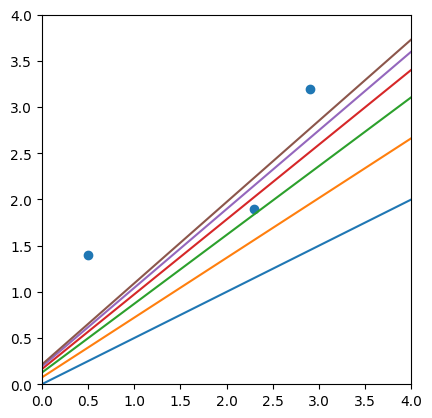

In [46]:
#
learning_rate = .01
x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])
# initial guess at b0 and b1
b0 = 0
b1 = .5
# find the endpoints of the line using these 
x0 = 0
x1 = 4
y0 = b0 + b1 * x0
y1 = b0 + b1 * x1
plt.scatter(x, y)
plt.plot([x0,x1], [y0, y1])
print(f'{b0=} {b1=}')
for qq in range(5):
  yhat = b0 + b1 * x
  residuals = y - yhat
  b0slope = -2 * residuals.sum()
  b0step = b0slope * learning_rate
  b1slope = (-2 * np.multiply(x,residuals)).sum()
  b1step = b1slope * learning_rate
  print(f'{b0slope=} {b1slope=}')
  b0 = b0 - b0step
  b1 = b1 - b1step
  y0new = b0 + b1 * x0
  y1new = b0 + b1 * x1
  plt.plot([x0,x1], [y0new, y1new])
  print(f'{qq=} {b0=} {b1=}')
print(f'{b1=} {b0=}')  
ax = plt.gca()
ax.set_ylim(bottom=0, top=4)
ax.set_xlim(left=0, right=4)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [18]:
# least squares

# generate x and y
x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])
#x = np.linspace(0, 1, 101)
#y = 1 + x + x * np.random.random(len(x))
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T
# print(A)
# turn y into a column vector
y = y[:, np.newaxis]
# print(y)
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[0.64102564]
 [0.94871795]]


In [19]:
x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])
b = np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y, rcond=None)[0]
b 

array([0.64102564, 0.94871795])

new let's repeat the process 5 times and see what happens

In [20]:
for qq in range(5):
  b0 = b0new
  b1 = b1new
  yhat = b0 + b1 * x
  residual = y - yhat
  b0new = b0 - (-2*residuals).sum()*learning_rate
  b1new = b1 - (-2*np.multiply(x, residuals)).sum()*learning_rate
  


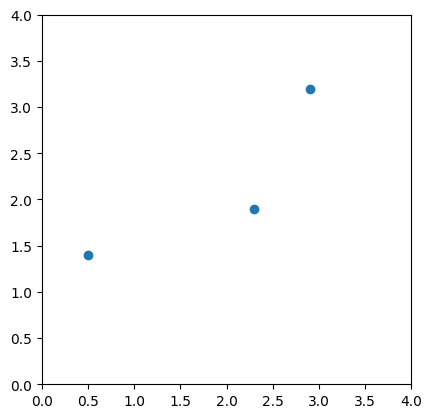

In [21]:
x0 = 0
x1 = 4
y0 = b0 + b1 * x0
y1 = b0 + b1 * x1
plt.scatter(x, y)
plt.plot([x0,x1], [y0, y1], color='red')
y0new = b0new + b1new * x0
y1new = b0new + b1new * x1
plt.plot([x0,x1], [y0new, y1new], color='pink')
ax = plt.gca()
ax.set_ylim(bottom=0, top=4)
ax.set_xlim(left=0, right=4)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

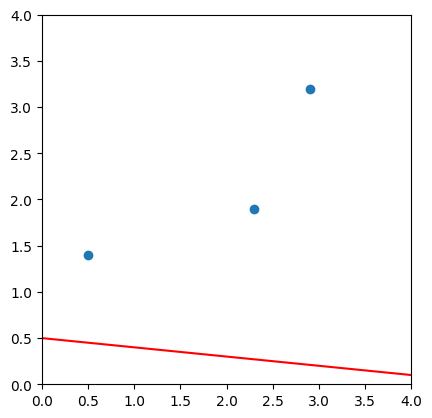

In [22]:
for qq in range(20):
  b0 = b0new
  b1 = b1new
  yhat = b0 + b1 * x
  residual = y - yhat
  b0new = b0 - (-2*residuals).sum()*learning_rate
  b1new = b1 - (-2*np.multiply(x, residuals)).sum()*learning_rate
b0 = .5
b1 = -.1
x0 = 0
x1 = 4
y0 = b0 + b1 * x0
y1 = b0 + b1 * x1
plt.scatter(x, y)
plt.plot([x0,x1], [y0, y1], color='red')
y0new = b0new + b1new * x0
y1new = b0new + b1new * x1
plt.plot([x0,x1], [y0new, y1new], color='pink')
ax = plt.gca()
ax.set_ylim(bottom=0, top=4)
ax.set_xlim(left=0, right=4)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()  
  


In [ ]:
# Let us make the code a little cleaner


# Let us make the code a little cleaner
## Least squares
$$
\beta = (X'X)^{-1}X'y
$$

In [54]:
betas = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(betas)

[0.64102564 0.94871795]


## Gradient descent converging

In [55]:
bv = np.ones(A.shape[1])
for i in range(500):
  bv = bv - (-2) * np.dot(y - np.dot(A, bv), A) * .01
print(bv)

[0.64114259 0.94844347]
